In [ ]:
#AI-ML Project :

#Name: Vraj Prajapati.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

#selection of dataset & simple info
df = pd.read_csv('market_data.csv',header='infer')
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()

print(df.info())
nulvl = df.isnull().sum()
print("The null value:\n",nulvl)
uni = df.nunique()
print("The Unique value:\n",uni)

print(df.shape)#original shape

#drop null values.
df1=df1.dropna(axis=0) #for rows
print(df1.shape)
df2=df2.dropna(axis=1) #for coloumns
print(df2.shape)

#Replacing null value with mean & mode values.
meitwg = np.mean(df.loc[~df["Item_Weight"].isna(),"Item_Weight"].values)
df3.loc[df["Item_Weight"].isna(),"Item_Weight"] = meitwg
print("The mean value: ",meitwg)
df3.info()

outsz = df.loc[:,"Outlet_Size"].mode()[0]
df3.loc[df["Outlet_Size"].isna(),"Outlet_Size"] = outsz
print("The mode value: ",outsz)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None
The null value:
 Item_Identifier        

In [3]:
#Statistical analysis on the selected dataset
print(df3.describe())
print("The Mode:\n",df3.mode())
print("The Variance: \n",df3.var(numeric_only=True))

#without inbulid fnc.
itmarr = np.array(df3["Item_MRP"])
n = len(itmarr)
print("Without Inbuil fnc:")

#Mean
total=0
for i in itmarr:
    total += i   
avg = total/n
print("The Mean for given observations is: ",avg)

#Median
nwarr = np.sort(itmarr)
if n%2==0:
    med = (nwarr[n//2] + nwarr[(n//2)+1])/2
else:
    med = nwarr[(n+1)//2]
print("The Median for given observations is: ",med)

#Mode
freq = {}
maxfreq = 0
mode = 0

for num in itmarr:
    if num in freq:
        freq[num] += 1
    else:
        freq[num] = 1    
        
    if freq[num] > maxfreq:
        maxfreq  = freq[num]
        mode = num
print("The Mode for given observations is: ",mode)

#Varience
total=0
for num in itmarr:
    total += ((num - avg)**2)
var = total/n
print("The Variance for given observations is: ",var)

#Standard Deviation
std = math.sqrt(var)
print("The Standard Deviation for given observations is: ",std)        

#range
maxn = max(itmarr)
minn = min(itmarr)
rang = (maxn - minn)
print("The range for given observations is: ",rang)

#unique value counts and unique values of all the columns of the dataset.
uniq = df3.nunique()
print("The Unique value:\n",uniq)
print("The all unique values of all columns:") 
for i in range(len(df3.columns)):
    print(df3[df3.columns[i]].unique())

       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  8523.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.226124         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       9.310000         0.026989    93.826500                1987.000000   
50%      12.857645         0.053931   143.012800                1999.000000   
75%      16.000000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800  
The Mode:
   Item_Identifier  Item_Weight Ite

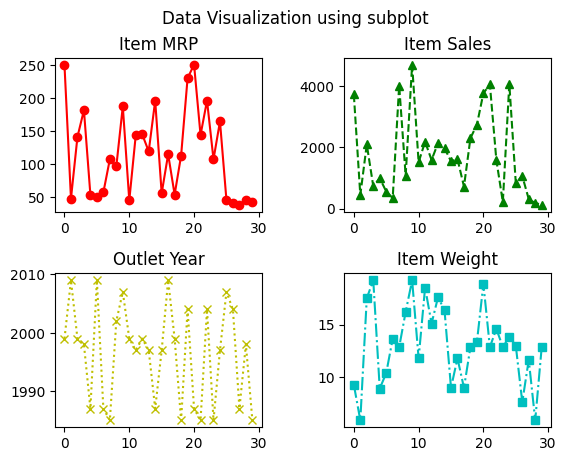

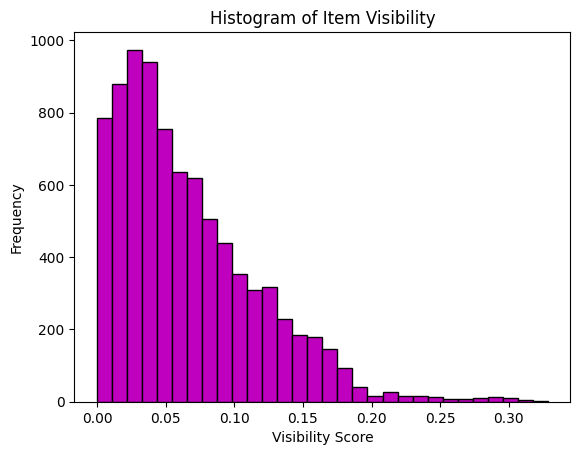

In [4]:
#visualise data using the subplot & histogram concept.
itmrp = np.array(df3["Item_MRP"])
itsl = np.array(df3["Item_Outlet_Sales"])
itwg = np.array(df3["Item_Weight"])
outy = np.array(df3["Outlet_Establishment_Year"])
itvisi = np.array(df3["Item_Visibility"])

#Subplot
plt.subplot(2,2,1)
plt.plot(itmrp[:30], label="Item MRP", marker='o', color='r', linestyle='-') 
plt.title("Item MRP")
plt.subplot(2,2,2)
plt.plot(itsl[:30], label="Item Sales", marker='^', color='g', linestyle='--')
plt.title("Item Sales")
plt.subplot(2,2,3)
plt.plot(outy[:30], label="Outlet Year", marker='x', color='y', linestyle=':')
plt.title("Outlet Year")
plt.subplot(2,2,4)
plt.plot(itwg[:30], label="Item Weight", marker='s', color='c', linestyle='-.')
plt.title("Item Weight")

plt.suptitle("Data Visualization using subplot")
plt.subplots_adjust(hspace=0.4,wspace=0.4)
plt.show()

#Histogram
plt.hist(itvisi, bins=30, color='m', edgecolor='k')
plt.title("Histogram of Item Visibility")
plt.xlabel("Visibility Score")
plt.ylabel("Frequency")
plt.show()

In [ ]:
#Main Machine Learning model:
#KNN Classification
df = pd.read_csv("knndata.csv")# Load the dataset
df.drop(columns=["id", "Unnamed: 32"], inplace=True)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features
scaler = StandardScaler() #Standardize features
X_train = scaler.fit_transform(X_train) #Fit & transform training data
X_test = scaler.transform(X_test) #Apply the same scaling to test data

# Get user input for K value
k = int(input("Enter the number of nearest neighbors to be used, i.e., k: "))

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

#output
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))


Enter the number of nearest neighbors to be used, i.e., k:  5


Accuracy: 0.956140350877193
              precision    recall  f1-score   support

           B       0.95      0.99      0.97        72
           M       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

